### CS5304 Data Science - Project Part 3
<break>Romoli Bakshi (rb636), Advika Nigam (an556)
<break>May 9, 2018

### I. Import the Data

In [47]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
import numpy as np
from sklearn.manifold import TSNE

In [2]:
usComments = pd.read_csv('youtube/UScomments.csv', error_bad_lines=False)
usVideos = pd.read_csv('youtube/USvideos.csv', error_bad_lines=False)
usVideos.head()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/Users/RomoliBakshi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


### II. Data Exploration

Explore the data and break it up into train and test samples.

In [3]:
# Get category information
categoryInfo = pd.read_json('youtube/US_category_id.json')['items']
ids = list(map(lambda entry: entry['id'], categoryInfo))
titles = list(map(lambda entry: entry['snippet']['title'], categoryInfo))
categories = dict(zip(ids, titles))

# Pick features and output columns we will work with
usContentData = usVideos[['title', 'channel_title', 'category_id', 'tags', 'views']]

# Add in category information to data
usContentData['category'] = list(map(lambda categoryId: categories[str(categoryId)], usContentData['category_id']))
usContentData

/Users/RomoliBakshi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,title,channel_title,category_id,tags,views,category
0,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,Entertainment
1,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,Science & Technology
2,My Response,PewDiePie,22,[none],5845909,People & Blogs
3,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,Science & Technology
4,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,Comedy
5,The Disaster Artist | Official Trailer HD | A24,A24,1,a24|a24 films|a24 trailers|independent films|t...,1311445,Film & Animation
6,"The Check In: HUD, Ben Carson and Hurricanes",Late Night with Seth Meyers,23,Late night|Seth Meyers|check in|hud|Ben Carson...,666169,Comedy
7,iPhone X Impressions & Hands On!,Marques Brownlee,28,iPhone X|iphone x|iphone 10|iPhone X impressio...,1728614,Science & Technology
8,ATTACKED BY A POLICE DOG!!,RomanAtwoodVlogs,22,Roman Atwood|Roman|Atwood|roman atwood vlogs|f...,1338533,People & Blogs
9,Honest Trailers - The Mummy (2017),Screen Junkies,1,screenjunkies|screen junkies|screenjunkies new...,1056891,Film & Animation


In [4]:
# Split into train and test sets
noTotalSamples = len(usContentData)
noTrainSamples = math.floor(noTotalSamples * 0.8)
noTestSamples = noTotalSamples - noTrainSamples

print('No. of total samples: ', str(noTotalSamples))
print('No. of features: ', str(usContentData.shape[1]))

# Split into training and testing
trainIndices = np.random.choice(list(range(noTotalSamples)), size=noTrainSamples, replace=False)
testIndices = filter(lambda index: index not in trainIndices, list(range(noTotalSamples)))
trainData = usContentData.loc[trainIndices]
testData = usContentData.loc[testIndices]

print('No. of train samples: ', str(len(trainData)))
print('No. of test samples: ', str(len(testData)))

No. of total samples:  7992
No. of features:  6
No. of train samples:  6393
No. of test samples:  1599


In [5]:
# View videos in order of descending views
top25Percentile = trainData.sort_values(by=['views'], ascending=False).head(n=math.floor(noTrainSamples/4))
top25Percentile.head()

,title,channel_title,category_id,tags,views,category
1907,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,Music
1694,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,38013692,Music
177,ZAYN - Dusk Till Dawn ft. Sia,ZaynVEVO,10,Dusk Till Dawn|Pop|RCA Records Label|ZAYN feat...,36323498,Music
7135,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,33191594,Entertainment
6917,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,32512343,Entertainment


In [6]:
print('Mean number of views: ', trainData['views'].mean())
print('Median number of views: ', trainData['views'].median())
print('\nCategory Count: \n', trainData['category'].value_counts())
print('\nCategory Count in top 25th Percentile: \n', top25Percentile['category'].value_counts())

Mean number of views:  941691.2244642578
Median number of views:  302032.0

Category Count: 
 Entertainment            1242
Music                    1021
People & Blogs            710
Howto & Style             703
Comedy                    605
News & Politics           513
Science & Technology      411
Sports                    330
Film & Animation          294
Education                 269
Autos & Vehicles           91
Pets & Animals             87
Gaming                     66
Travel & Events            39
Nonprofits & Activism      11
Shows                       1
Name: category, dtype: int64

Category Count in top 25th Percentile: 
 Entertainment            347
Comedy                   288
Music                    234
People & Blogs           190
Science & Technology     125
Howto & Style            105
Film & Animation         104
News & Politics           63
Education                 42
Sports                    39
Pets & Animals            22
Autos & Vehicles          16
Gaming 

### III. Create Representations 

Here, we create different representations of our data to be inputted into each model. We tried different representations of varying levels of specificity:

#### Bag Of Tags Representation: Binary Vectors Corresponding to Unique Tags

In [7]:
# Get all unique tags
uniqueTags = set()

for index, row in trainData.iterrows():
    uniqueTags = uniqueTags.union(row['tags'].split('|'))
    
uniqueTags = list(uniqueTags)
print('Number of unique tags: ', len(uniqueTags))

Number of unique tags:  23304


In [8]:
# Convert tags for each video to binary vector representation over all unique tags
tagLists = []
for index, row in trainData.iterrows():
    tagsFound = row['tags'].split('|')
    tagLists.append(list(map(lambda tag: int(tag in tagsFound), uniqueTags)))

# Create bag of tags representation of each video
bagOfTags = pd.DataFrame(tagLists, columns=uniqueTags)
bagOfTags.head()

,,penn state nittany lions,aztecs,10th anniversary,sinkhole in water,Randy Orton,star,buzzfeed blue,#youtubeblack,chilling,...,republica dominicana,paleontologist,Washington,pictured,mario,sale,destiny,chris young new album,Grey and Avril Lavigne Wings,Hex-Rays
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
bagOfTags.index = trainData.index
bagOfTags.head()

,,penn state nittany lions,aztecs,10th anniversary,sinkhole in water,Randy Orton,star,buzzfeed blue,#youtubeblack,chilling,...,republica dominicana,paleontologist,Washington,pictured,mario,sale,destiny,chris young new album,Grey and Avril Lavigne Wings,Hex-Rays
1236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Bag of Categories Representation: Binary Vectors Corresponding to Unique Categories¶

In [10]:
# Create bag of categories representations of each video
uniqueCategories = list(categories.values())
categoryLists = []

for index, row in trainData.iterrows():
    categoryLists.append(list(map(lambda category: int(category in row['category']), uniqueCategories)))

bagOfCategories = pd.DataFrame(categoryLists, columns=uniqueCategories)
bagOfCategories.index = trainData.index
bagOfCategories.head()

,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,Short Movies,Travel & Events,Gaming,Videoblogging,People & Blogs,...,Documentary,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers
1236,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3885,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Bag of Words Representation: Binary Vectors Corresponding to Unique Words Within Tags¶

In [11]:
# Try to break tags into words
uniqueWords = []
for tag in uniqueTags:
    uniqueWords = uniqueWords + tag.split(' ')

uniqueWords = list(set(uniqueWords))

print('No. of Unique Tags', len(uniqueTags))
print('No. of Unique Words within Tags', len(uniqueWords))

No. of Unique Tags 23304
No. of Unique Words within Tags 16781


In [12]:
# Create bag of words representation
wordLists = []
for index, row in trainData.iterrows():
    wordsFound = []
    for tag in row['tags'].split('|'):
        wordsFound = wordsFound + tag.split(' ')
    wordLists.append(list(map(lambda word: int(word in wordsFound), uniqueWords)))
    
# Create bag of tags representation of each video
bagOfWords = pd.DataFrame(wordLists, columns=uniqueWords)
bagOfWords.index = trainData.index
bagOfWords.head()

,,Heaton,Rico),Bell,aztecs,Cell,Sharif,finish,arista,star,...,Porter,Adviser,ilmb,Trilogy,Comes,destiny,taylors,song,Hex-Rays,zombae
1236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### IV. Model Experimentation

In [13]:
# RANDOM SAMPLING

# Get numbers of train and validation samples
noInnerTrainSamples = math.floor(len(trainData)*0.8)
noValidationSamples = len(trainData) - noInnerTrainSamples

# Split into inner train and validation
innerTrainIndices = np.random.choice(trainData.index.tolist(), size=noInnerTrainSamples, replace=False)
validationIndices = list(filter(lambda index: index not in innerTrainIndices, trainData.index.tolist()))
innerTrainData = trainData.loc[innerTrainIndices]
validationData = trainData.loc[validationIndices]

print('No. of inner train samples: ', str(len(innerTrainData)))
print('No. of validation samples: ', str(len(validationData)))

No. of inner train samples:  5114
No. of validation samples:  1279


In [14]:
# CREATE TRAIN SETS BASED ON DIFFERENT REPRESENTATIONS

# Bag of Tags
bagOfTags_trainX = bagOfTags.loc[innerTrainIndices]
bagOfTags_validationX = bagOfTags.loc[validationIndices]

# Bag of Tag Words
bagOfWords_trainX = bagOfWords.loc[innerTrainIndices]
bagOfWords_validationX = bagOfWords.loc[validationIndices]

# Bag of Categories
bagOfCategories_trainX = bagOfCategories.loc[innerTrainIndices]
bagOfCategories_validationX = bagOfCategories.loc[validationIndices]

# Get train and validation view data for output 
# Same data used for all three representations, since the same random indices are used for all three
trainY = trainData.loc[innerTrainIndices]['views']
validationY = trainData.loc[validationIndices]['views']

In [15]:
bagOfTags_trainX.head()

,,penn state nittany lions,aztecs,10th anniversary,sinkhole in water,Randy Orton,star,buzzfeed blue,#youtubeblack,chilling,...,republica dominicana,paleontologist,Washington,pictured,mario,sale,destiny,chris young new album,Grey and Avril Lavigne Wings,Hex-Rays
3130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
bagOfWords_trainX.head()

,,Heaton,Rico),Bell,aztecs,Cell,Sharif,finish,arista,star,...,Porter,Adviser,ilmb,Trilogy,Comes,destiny,taylors,song,Hex-Rays,zombae
3130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
bagOfCategories_trainX.head()

,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,Short Movies,Travel & Events,Gaming,Videoblogging,People & Blogs,...,Documentary,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers
3130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1518,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Multiple Linear Regression

In [118]:
# Linear Regression - get predictions
def runLinearRegression(trainX, trainY, validationX, title):
    # Fit model
    model = LinearRegression()
    model.fit(trainX, trainY)
    
    # Make predictions
    predictions = model.predict(validationX)
    
    # Calculate error metrics
    mse = mean_squared_error(validationY, predictions)
    r2 = model.score(validationX, validationY)
    print('MSE: ', mse)
    print('R2: ', r2)
    
    # Plot views vs. view prediction error
    error = list(map(lambda val: abs(val), validationY - predictions))
    plt.figure(figsize=(10,10))
    plt.scatter(validationY, error, color='blue')  
    plt.title('Multiple Linear Regression Model ' + title + ' - Actual Values vs Prediction Error')
    plt.xlabel('Actual No. of Views (Validation Y)')
    plt.ylabel('Error (Abs(Validation Y - Prediction Y))')
    plt.show()

MSE:  1.5767984112675573e+38
R2:  -3.075223499082731e+25


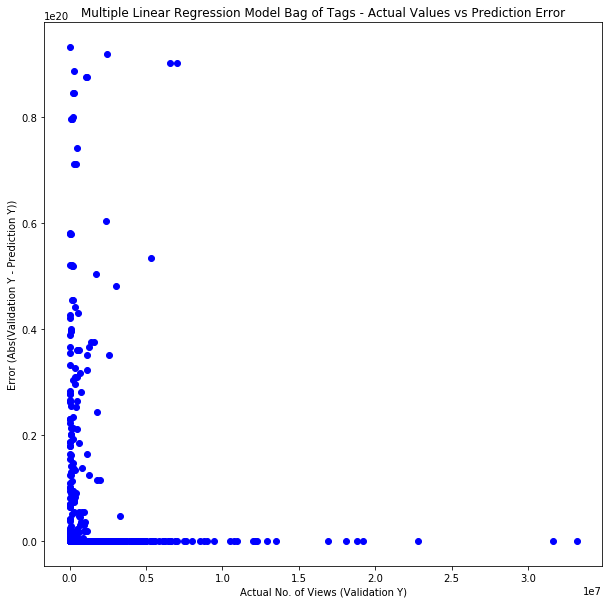

In [119]:
# Run linear regression for all model representations (tags, words, categories)
runLinearRegression(bagOfTags_trainX, trainY, bagOfTags_validationX, 'Bag of Tags')

MSE:  2.4487327947613327e+38
R2:  -4.775753564700156e+25


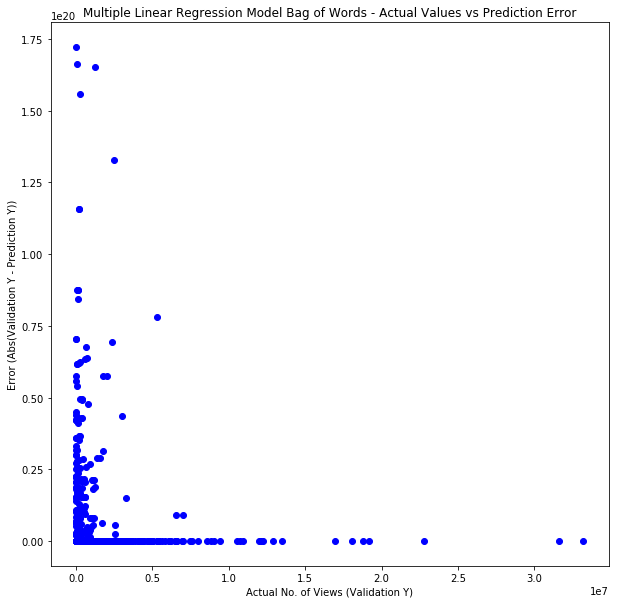

In [121]:
runLinearRegression(bagOfWords_trainX, trainY, bagOfWords_validationX, 'Bag of Words')

MSE:  5043270407333.731
R2:  0.016413033014556433


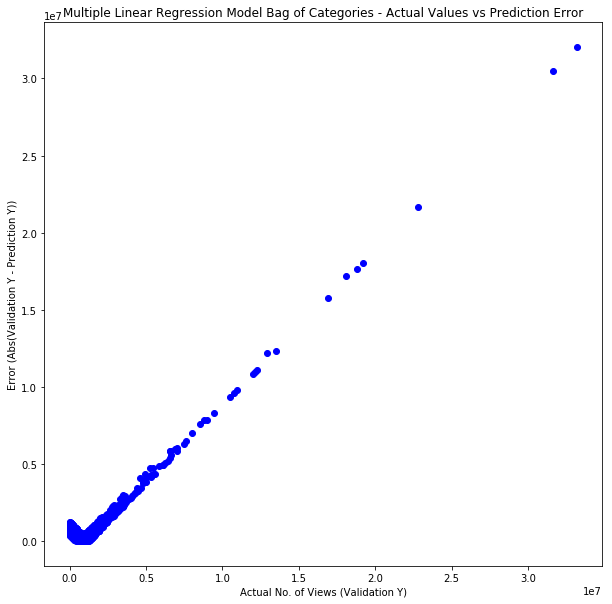

In [122]:
runLinearRegression(bagOfCategories_trainX, trainY, bagOfCategories_validationX, 'Bag of Categories')

#### Random Forest Regressor

In [18]:
# Random Forest Regressor 
def runRandomForestRegressor(trainX, trainY, validationX, depth, title):
    # Fit model
    model = RandomForestRegressor(max_depth=depth, random_state=0)
    model.fit(trainX, trainY)
    
    # Make predictions
    predictions = model.predict(validationX)
    
    # Calculate error metrics
    mse = mean_squared_error(validationY, predictions)
    r2 = model.score(validationX, validationY)
    print('Model Representation: ', title)
    print('Depth: ', depth)
    print('MSE: ', mse)
    print('R2: ', r2)
    
    # Plot views vs. view prediction error
    error = list(map(lambda val: abs(val), validationY - predictions))
    plt.figure(figsize=(10,10))
    plt.scatter(validationY, error, color='blue')  
    plt.title('Random Forest Regressor for ' + title + ' - Actual Values vs Prediction Error')
    plt.xlabel('Actual No. of Views (Validation Y)')
    plt.ylabel('Error (Abs(Validation Y - Prediction Y))')
    plt.show()

Model Representation:  Bag of Tags
Depth:  9
MSE:  2661201668950.6265
R2:  0.45588094563727066


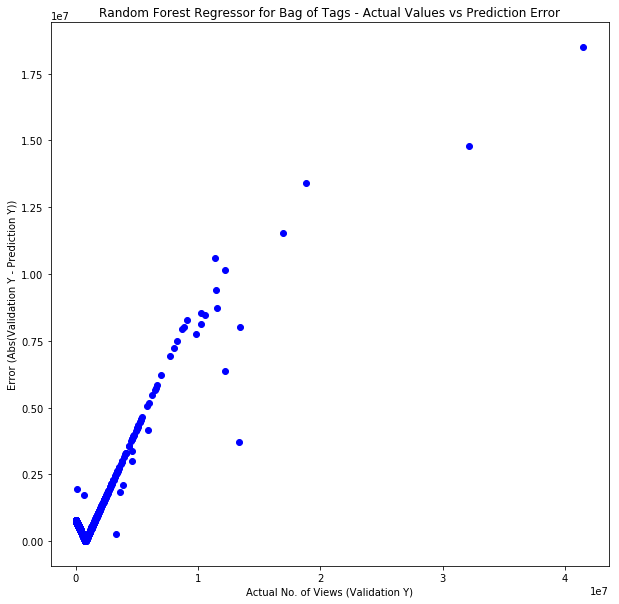

In [19]:
runRandomForestRegressor(bagOfTags_trainX, trainY, bagOfTags_validationX, 9, 'Bag of Tags')

Model Representation:  Bag of Words
Depth:  9
MSE:  2442420444971.089
R2:  0.5236557385305041


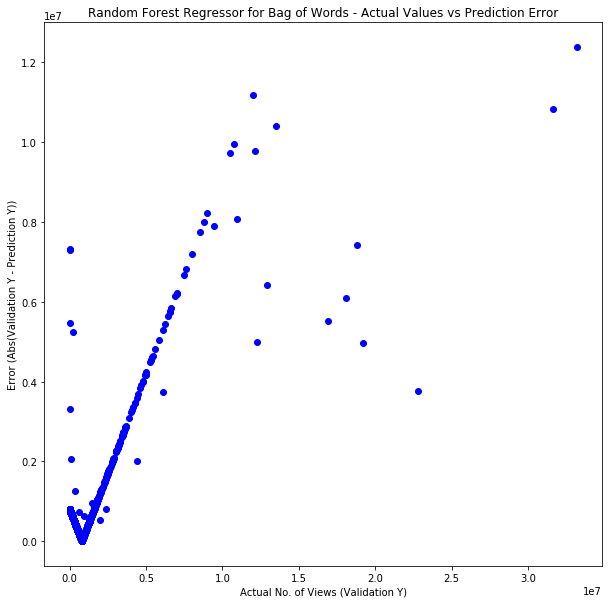

In [128]:
runRandomForestRegressor(bagOfWords_trainX, trainY, bagOfWords_validationX, 9, 'Bag of Words')

Model Representation:  Bag of Categories
Depth:  9
MSE:  5043329765452.665
R2:  0.01640145642487323


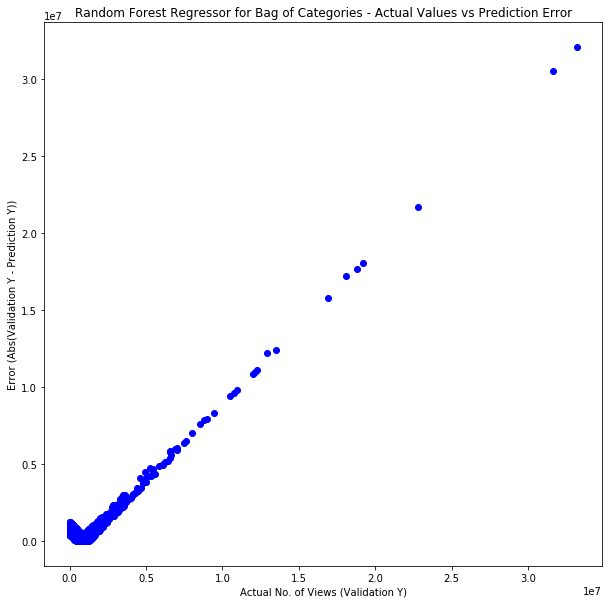

In [129]:
runRandomForestRegressor(bagOfCategories_trainX, trainY, bagOfCategories_validationX, 9, 'Bag of Categories')

#### K-Nearest Neighbors Regressor

In [130]:
# KNN Regressor 
def runKNNRegressor(trainX, trainY, validationX, numNeighbors, title):    
    # Fit model
    model = KNeighborsRegressor(n_neighbors=numNeighbors)
    model.fit(trainX, trainY)
    
    # Make predictions
    predictions = model.predict(validationX)
    
    # Calculate error metrics
    mse = mean_squared_error(validationY, predictions)
    r2 = model.score(validationX, validationY)
    print('Model Representation: ', title)
    print('K: ', numNeighbors)
    print('MSE: ', mse)
    print('R2: ', r2)
    
    # Plot views vs. view prediction error
    error = list(map(lambda val: abs(val), validationY - predictions))
    plt.figure(figsize=(10,10))
    plt.scatter(validationY, error, color='blue')  
    plt.title('KNN Regressor for ' + title + ' - Actual Values vs Prediction Error')
    plt.xlabel('Actual No. of Views (Validation Y)')
    plt.ylabel('Error (Abs(Validation Y - Prediction Y))')
    plt.show()

Model Representation:  Bag of Tags
K:  35
MSE:  4413033546062.025
R2:  0.13932787056902096


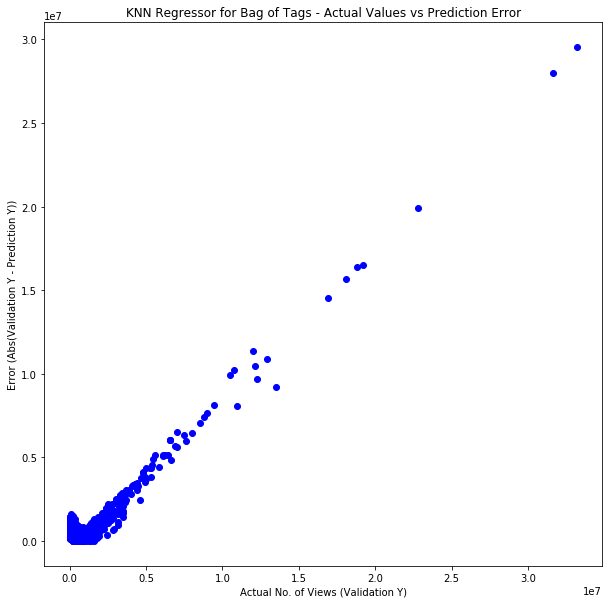

In [131]:
runKNNRegressor(bagOfTags_trainX, trainY, bagOfTags_validationX, 35, 'Bag of Tags')

Model Representation:  Bag of Words
K:  35
MSE:  4395110467914.926
R2:  0.14282340117711867


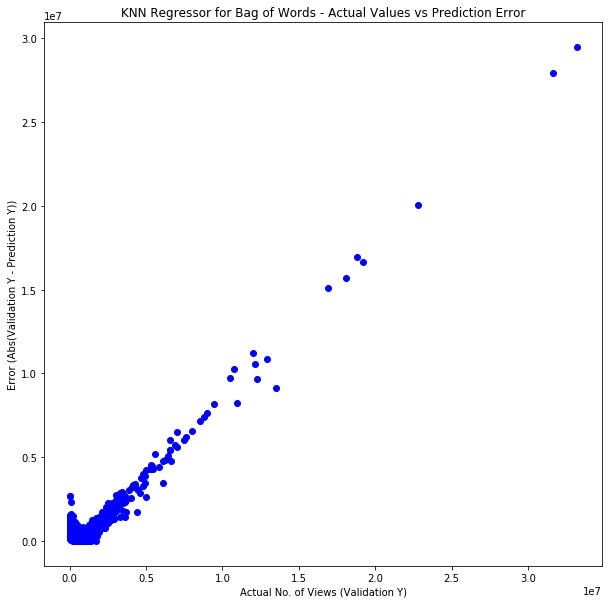

In [132]:
runKNNRegressor(bagOfWords_trainX, trainY, bagOfWords_validationX, 35, 'Bag of Words')

Model Representation:  Bag of Categories
K:  35
MSE:  5138235790015.475
R2:  -0.0021080267693327492


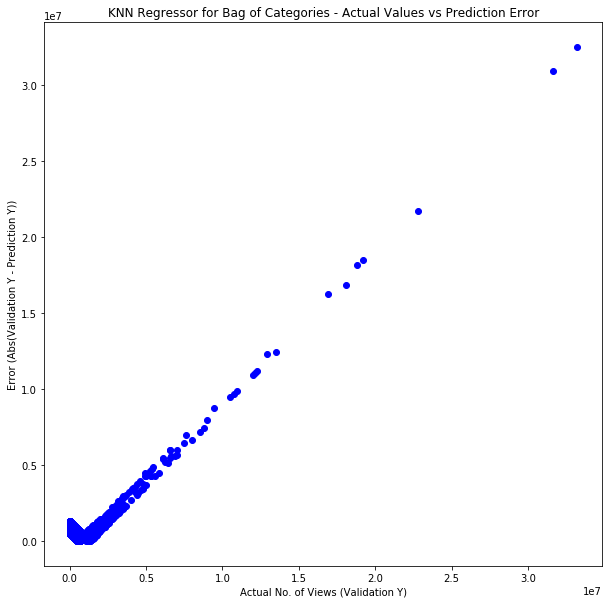

In [135]:
runKNNRegressor(bagOfCategories_trainX, trainY, bagOfCategories_validationX, 35, 'Bag of Categories')

### V. Expanding Upon Random Forests Model

We begin by tuning hyperparameters, such as:
- max_depth: the max number of levels in each decision tree
- n_estimators: the number of trees in the forest
- max_features: max number of features considered for splitting a node (will leave at auto for now)

#### Testing Max Levels in Each Decision Tree (max_depth)

In [139]:
# Random Forest Regressor 
def getMSEforRandomForest(trainX, trainY, validationX, depth):
    # Fit model
    model = RandomForestRegressor(max_depth=depth, random_state=0)
    model.fit(trainX, trainY)
    
    # Make predictions
    predictions = model.predict(validationX)
    
    # Calculate error metrics
    mse = mean_squared_error(validationY, predictions)
        
    print("Depth: ", depth)
    print("MSE: ", mse)
    
    return mse

# Find depth that produces the lowest MSE for words
minDepth = 14
minMse = getMSEforRandomForest(bagOfWords_trainX, trainY, bagOfWords_validationX, minDepth)

for depth in range(15, 25):
    mse = getMSEforRandomForest(bagOfWords_trainX, trainY, bagOfWords_validationX, depth)
    if(mse < minMse):
        minMse = mse
        minDepth = depth

print("minMse: ", minMse)
print("minDepth: ", minDepth)

Depth:  14
MSE:  2119044624800.0125
Depth:  15
MSE:  2077507307113.794
Depth:  16
MSE:  2038257489957.0793
Depth:  17
MSE:  2021646700529.181
Depth:  18
MSE:  2003622739209.6802
Depth:  19
MSE:  1976349026496.5364
Depth:  20
MSE:  1955689992718.5664
Depth:  21
MSE:  1912279482633.0066
Depth:  22
MSE:  1880935449456.0935
Depth:  23
MSE:  1843950046281.2075
Depth:  24
MSE:  1820957023280.9578
minMse:  1820957023280.9578
minDepth:  24


#### Testing Number of Trees (n_estimators)

In [55]:
# Random Forest Regressor 
def getMSEforRandomForest(trainX, trainY, validationX, depth, numTrees):
    # Fit model
    model = RandomForestRegressor(n_estimators=numTrees, max_depth=depth, random_state=0)
    model.fit(trainX, trainY)
    
    # Make predictions
    predictions = model.predict(validationX)
    
    # Calculate error metrics
    mse = mean_squared_error(validationY, predictions)
        
    print("Num Trees: ", numTrees)
    print("MSE: ", mse)
    
    return mse

# Find n_estimators that produces the lowest MSE for words
depth = 25
minNumTrees = 5
minMse = getMSEforRandomForest(bagOfWords_trainX, trainY, bagOfWords_validationX, depth, minNumTrees)

for numTrees in range(10, 20):
    mse = getMSEforRandomForest(bagOfWords_trainX, trainY, bagOfWords_validationX, depth, numTrees)
    if(mse < minMse):
        minMse = mse
        minNumTrees = numTrees

print("minMse: ", minMse)
print("minNumTrees: ", minNumTrees)

Num Trees:  5
MSE:  1857729797805.1807
Num Trees:  10
MSE:  1893282318221.6965
Num Trees:  11
MSE:  1927683754732.0552
Num Trees:  12
MSE:  2015269322074.504
Num Trees:  13
MSE:  2018844690093.7808
Num Trees:  14
MSE:  2016809542105.0574
Num Trees:  15
MSE:  2000992053040.4387
Num Trees:  16
MSE:  2002103943473.8596
Num Trees:  17
MSE:  1988765257192.1938
Num Trees:  18
MSE:  2008164817753.234
Num Trees:  19
MSE:  1989928045781.745
minMse:  1857729797805.1807
minNumTrees:  5


In [145]:
# Best model so far -- random forest with tuned hyperparameters
numTrees = 19
maxDepth = 24
mse = getMSEforRandomForest(bagOfWords_trainX, trainY, bagOfWords_validationX, maxDepth, numTrees)
print('numTrees: ', numTrees)
print('maxDepth: ', maxDepth)
print('mse: ', mse)

Num Trees:  19
MSE:  1741549316371.672
numTrees:  19
maxDepth:  24
mse:  1741549316371.672


In [150]:
bagOfWords_trainX.head()

,,chronicle,Race,Elevation,gummy,Tribeca,crabs,tarzan,sp:ti:away=Car,obese,...,guilty,tatoo,Children,Rosanna,Chemicals,dying,Stonewall,Sense,Mandi,lügen
1386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
bagOfCategories_trainX.head()

,Film & Animation,Autos & Vehicles,Music,Pets & Animals,Sports,Short Movies,Travel & Events,Gaming,Videoblogging,People & Blogs,...,Documentary,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers
1386,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
words_categories_trainX = pd.concat([bagOfWords_trainX, bagOfCategories_trainX], axis=1)
words_categories_trainX.head()

,,Heaton,Rico),Bell,aztecs,Cell,Sharif,finish,arista,star,...,Documentary,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers
3130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
words_categories_validationX = pd.concat([bagOfWords_validationX, bagOfCategories_validationX], axis=1)
words_categories_validationX.head()

,,Heaton,Rico),Bell,aztecs,Cell,Sharif,finish,arista,star,...,Documentary,Drama,Family,Foreign,Horror,Sci-Fi/Fantasy,Thriller,Shorts,Shows,Trailers
3885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1269,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5072,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Best model so far -- random forest with tuned hyperparameters, using words and categories
numTrees = 19
maxDepth = 24
mse = getMSEforRandomForest(words_categories_trainX, trainY, words_categories_validationX, maxDepth, numTrees)
print('numTrees: ', numTrees)
print('maxDepth: ', maxDepth)
print('mse: ', mse)

Num Trees:  19
MSE:  1987152446425.3054
numTrees:  19
maxDepth:  24
mse:  1987152446425.3054


Model Representation:  Words and Categories
Depth:  24
MSE:  1987152446425.3054
R2:  0.5936995220471651


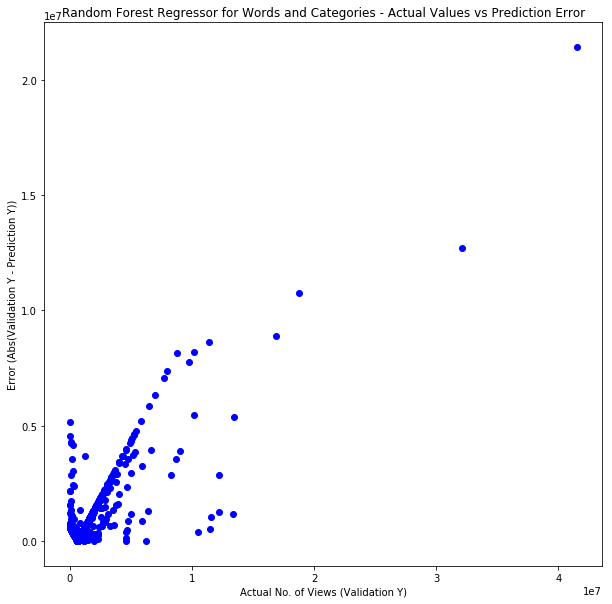

In [25]:
# Updated Version - Random Forest Regressor with max_depth and numTrees
def runRandomForestRegressor(trainX, trainY, validationX, depth, numTrees, title):
    # Fit model
    model = RandomForestRegressor(n_estimators=numTrees, max_depth=depth, random_state=0)
    model.fit(trainX, trainY)
    
    # Make predictions
    predictions = model.predict(validationX)
    
    # Calculate error metrics
    mse = mean_squared_error(validationY, predictions)
    r2 = model.score(validationX, validationY)
    print('Model Representation: ', title)
    print('Depth: ', depth)
    print('MSE: ', mse)
    print('R2: ', r2)
    
    # Plot views vs. view prediction error
    error = list(map(lambda val: abs(val), validationY - predictions))
    plt.figure(figsize=(10,10))
    plt.scatter(validationY, error, color='blue')  
    plt.title('Random Forest Regressor for ' + title + ' - Actual Values vs Prediction Error')
    plt.xlabel('Actual No. of Views (Validation Y)')
    plt.ylabel('Error (Abs(Validation Y - Prediction Y))')
    plt.show()
    
numTrees = 19
maxDepth = 24
runRandomForestRegressor(words_categories_trainX, trainY, words_categories_validationX, 
                         maxDepth, numTrees, 'Words and Categories')

### VI. Dimensionality Reduction on Input to Random Forests

In [52]:
words_categories_trainX.shape

svd = TruncatedSVD(n_components=75, n_iter=7, random_state=42)
svd.fit(words_categories_trainX) 
transformed_words_categories_trainX = svd.transform(words_categories_trainX) 
transformed_words_categories_validationX = svd.transform(words_categories_validationX) 

Model Representation:  Words and Categories - with TruncatedSVD(n_components=75)
Depth:  24
MSE:  1354740822682.7722
R2:  0.7230047222857007


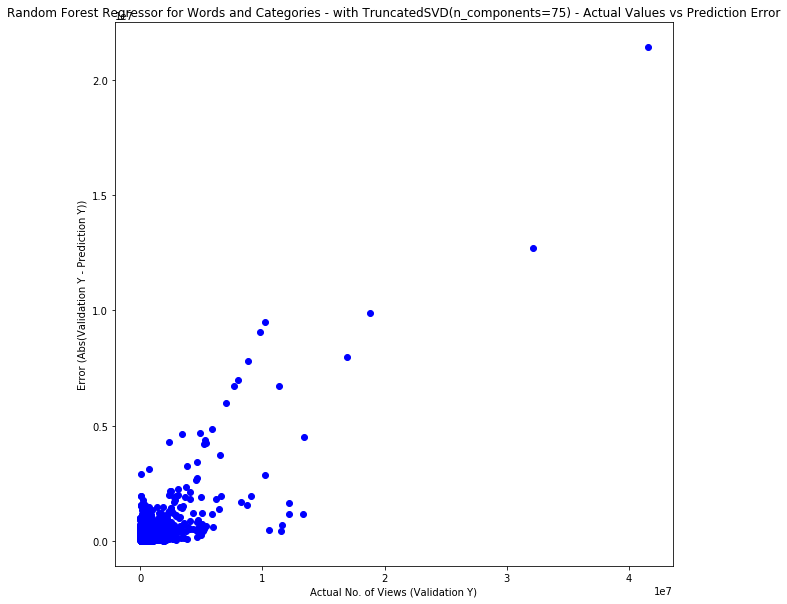

In [53]:
numTrees = 19
maxDepth = 24
runRandomForestRegressor(transformed_words_categories_trainX , trainY, transformed_words_categories_validationX, 
                         maxDepth, numTrees, 'Words and Categories - with TruncatedSVD(n_components=75)')

In [48]:
transformed_words_categories_trainX

array([[ 0.10527033,  0.01061063, -0.2533563 , ...,  0.10637805,
        -0.0736583 ,  0.01404321],
       [ 0.3886022 ,  0.02963121, -0.65602522, ..., -0.15435181,
        -0.27416764, -0.05207785],
       [ 0.82388433,  0.09871783, -0.70761015, ...,  0.39881441,
        -0.259191  ,  0.20819715],
       ...,
       [ 0.04727479, -0.04517111, -0.0376429 , ..., -0.04030752,
        -0.06999081, -0.10307085],
       [ 0.6365326 , -0.0342362 ,  1.05635442, ..., -0.05547715,
        -0.00591926,  0.0568525 ],
       [ 1.30415862, -1.44502815,  0.02505953, ...,  0.38509208,
         0.4686929 ,  0.28932953]])

In [49]:
svd.explained_variance_ratio_

array([0.01124067, 0.01486626, 0.01143243, 0.01092131, 0.00949292,
       0.00845395, 0.00751551, 0.00716583, 0.00683215, 0.00616563,
       0.00605631, 0.00571286, 0.00575717, 0.00535288, 0.00530206,
       0.00498145, 0.00487074, 0.00478775, 0.00458637, 0.00425581,
       0.00413934, 0.00411788, 0.00405189, 0.00393903, 0.00388157,
       0.00372563, 0.00368912, 0.0036585 , 0.00359491, 0.00350441,
       0.00341518, 0.00340324, 0.00336334, 0.00324656, 0.00321399,
       0.00319461, 0.00314818, 0.00306081, 0.00305442, 0.00299731,
       0.0029384 , 0.00284785, 0.00286591, 0.00285374, 0.00283932,
       0.00278209, 0.00278393, 0.00274034, 0.00272721, 0.00265569,
       0.00264475, 0.00260283, 0.00254868, 0.00252502, 0.00250717,
       0.00248059, 0.00246956, 0.00244494, 0.00242275, 0.00238333,
       0.00237457, 0.00236326, 0.00234485, 0.00233745, 0.00226988,
       0.00225135, 0.00223098, 0.00222039, 0.00216594, 0.00215531,
       0.00212669, 0.00209535, 0.00207815, 0.00207463, 0.00203

In [ ]:
# Other dim red techniques used
words_categories_trainX.shape

# t-SNE
for comp in [100, 150, 500, 1000]:
    transformed_words_categories_trainX = TSNE(n_components=comp).fit_transform(words_categories_trainX)

### VI. Testing Other Model Types

Below is extra code we wrote to test other types of models, such as :

- MLP Regressor
- Logistic Regression


In [ ]:
# Logistic Regression - get predictions
model = LogisticRegression()
model.fit(trainX, trainY)
predictions = model.predict(validationX)

# Calculate error metrics
mse = mean_squared_error(validationY, predictions)

print('MSE: ', mse)
print('R2: ', model.score(validationX, validationY))

# Plot views vs. view prediction error
error = list(map(lambda val: abs(val), validationY - predictions))
plt.figure(figsize=(10,10))
plt.scatter(validationY, error, color='blue')  
plt.title('Logistic Regression Model - Actual Values vs Prediction Error')
plt.xlabel('Actual No. of Views (Validation Y)')
plt.ylabel('Error (Abs(Validation Y - Prediction Y))')
plt.show()

In [ ]:
# mlp
mlp = MLPRegressor(max_iter=500)
mlp.fit(trainX, trainY)
mlpPredictions = mlp.predict(validationX)

# Calculate error metrics
mse = mean_squared_error(validationY, mlpPredictions)
r2 = mlp.score(validationX, validationY)

print('MSE - MLP Regressor: ', mse)
print('R2 - MLP Regressor: ', r2)